In [14]:
import numpy as np
import pandas as pd
import json
import random 

from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil import rrule

In [5]:
# Taken from https://galea.medium.com/how-to-love-jsonl-using-json-line-format-in-your-workflow-b6884f65175b
def dump_jsonl(data, output_path, append=False):
    """
    Write list of objects to a JSON lines file.
    """
    mode = 'a+' if append else 'w'
    with open(output_path, mode, encoding='utf-8') as f:
        for line in data:
            json_record = json.dumps(line, ensure_ascii=False)
            f.write(json_record + '\n')
    print('Wrote {} records to {}'.format(len(data), output_path))

def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [107]:
def print_random_tweets(data):
    num=random.randint(1,10000)
    print(data[num]["created_at"])
    print(data[num]["author_id"])
    print(data[num]["text"])
    print(data[num]["author"]["username"])
    print()
    
def reduce_data(data):
    date = []
    for num in range(len(data)):
        date.append(data[num]["created_at"])
    return date

In [ ]:
# filename_PRI= '../data/elecciones/from_0530_to_0706/PRI/'
# filename_PAN= '../data/elecciones/from_0530_to_0706/PAN/PAN_from_0530_to_0706.jsonl'
# filename_MC = '../data/elecciones/from_0530_to_0706/MovimientoCiudadano/MovimientoCiudadano_from_0530_to_0706.jsonl';
# filename_Juntos = '../data/elecciones/from_0530_to_0706/Juntos/Juntos_from_0530_to_0706.jsonl'
# filename_PRI_filtered = '../data/PRI_filtered/PRI_filtered_stream_011220_to_010621.jsonl';

In [33]:
data_MC=load_jsonl('../data/elecciones/from_0530_to_0706/MovimientoCiudadano/MovimientoCiudadano_from_0530_to_0706.jsonl')

Loaded 67382 records from ../data/elecciones/from_0530_to_0706/MovimientoCiudadano/MovimientoCiudadano_from_0530_to_0706.jsonl


In [ ]:
data_PAN=load_jsonl('../data/elecciones/from_0530_to_0706/PAN/PAN_from_0530_to_0706.jsonl')

In [44]:
data_PRI=load_jsonl('../data/elecciones/from_0530_to_0706/PRI/PRI_from_0530_to_0706.jsonl')

Loaded 146949 records from ../data/elecciones/from_0530_to_0706/PRI/PRI_from_0530_to_0706.jsonl


In [66]:
data_PRD=load_jsonl('../data/elecciones/from_0530_to_0706/PRD/PRD_from_0530_to_0706.jsonl')

Loaded 198388 records from ../data/elecciones/from_0530_to_0706/PRD/PRD_from_0530_to_0706.jsonl


In [96]:
data_vpM=load_jsonl('../data/elecciones/from_0530_to_0706/VaPorMexico/VaPorMexico_from_0530_to_0706.jsonl')

Loaded 436764 records from ../data/elecciones/from_0530_to_0706/VaPorMexico/VaPorMexico_from_0530_to_0706.jsonl


In [106]:
data_Juntos=load_jsonl('../data/elecciones/from_0530_to_0706/Juntos/Juntos_from_0530_to_0706.jsonl')

Loaded 2034438 records from ../data/elecciones/from_0530_to_0706/Juntos/Juntos_from_0530_to_0706.jsonl


In [108]:
print_random_tweets(data_MC)
print_random_tweets(data_PAN)
print_random_tweets(data_PRI)
print_random_tweets(data_PRD)
print_random_tweets(data_vpM)
print_random_tweets(data_Juntos)

2021-06-06T05:14:50.000Z
209382164
RT @_frankyjalisco_: Lagos de Moreno jalisco

Personal de Movimiento Ciudadano se encuentra repartiendo despensas en la veda electoral.
#at…
phackooo

2021-06-06T19:34:04.000Z
81984965
#Optimismo #Derechoso 😆😂🤣¿ Y cómo estuvo la compra de votos @AccionNacional ?,  ¿les alcanzará para mantener el registro?.😬

Así con esas mismas caras estuvo la clase más vulderable de méxico cuando sus ingresos no les alcanzaban para lo más básico durante su "administración" https://t.co/XRZWcUtbrI
robertcn100

2021-06-06T20:37:29.000Z
553309245
RT @abrahamendieta: ⚠️ 15 detenidos en Metepec, vinculados al PRI, por agresiones contra una casilla y votante: entrarían en prisión preven…
axtzco63

2021-06-06T22:59:44.000Z
1663973792
RT @Pablo_Hdez: Con encuestas de salida en mano les puedo adelantar que el @PRDMexico PIERDE EL REGISTRO
soloxaprender

2021-06-06T23:34:26.000Z
114378719
RT @HomoExNovo: Detienen a operadores electorales del @PRI_Nacional presuntamente vincula

In [110]:
date_MC = reduce_data(data_MC)
date_PAN = reduce_data(data_PAN)
date_PRI = reduce_data(data_PRI)
date_PRD = reduce_data(data_PRD)
date_vpM = reduce_data(data_vpM)
date_Juntos = reduce_data(data_Juntos)

In [ ]:
# ###Le das la estructura de fechas a la columna donde las tengas###
# df['Fechas '] = pd.to_datetime(df['Fechas'])
# ###Le das el formato específico que quieres, en este caso la dejo por horas, pero lo puedes pasar a minutos o segundos, como se que te haga más útil###
# df['Fechas'] = df['Fechas'].dt.strftime('%d/%m/%y %H')

In [69]:
# date= pd.to_datetime(date)
# day = date.day
# week = date.isocalendar().week
# month = date.month
# year = date.year
# dayOfYear = date.day_of_year

NameError: name 'date' is not defined

In [111]:
dayOfYear_MC = pd.to_datetime(date_MC).day_of_year
dayOfYear_PAN = pd.to_datetime(date_PAN).day_of_year
dayOfYear_PRI = pd.to_datetime(date_PRI).day_of_year
dayOfYear_PRD = pd.to_datetime(date_PRD).day_of_year
dayOfYear_vpM = pd.to_datetime(date_vpM).day_of_year
dayOfYear_Juntos = pd.to_datetime(date_Juntos).day_of_year

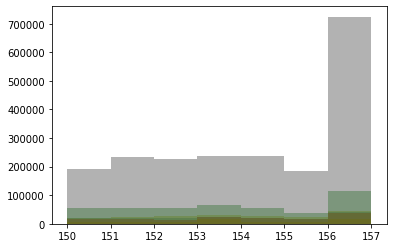

In [112]:
n_PAN, bins_PAN, patches_PAN = plt.hist(dayOfYear_PAN,xBins,alpha=alphaNum, color='steelblue')
n_PRI, bins_PRI, patches_PRI = plt.hist(dayOfYear_PRI,xBins,alpha=alphaNum,color='red')
n_MC, bins_MC, patches_MC = plt.hist(dayOfYear_MC,xBins,alpha=alphaNum,color='orange')
n_PRD, bins_PRD, patches_PRD = plt.hist(dayOfYear_PRD,xBins,alpha=alphaNum,color='y')
n_vpM, bins_vpM, patches_vpM = plt.hist(dayOfYear_vpM,xBins,alpha=alphaNum,color='g')
n_Juntos, bins_Juntos, patches_Juntos = plt.hist(dayOfYear_Juntos,xBins,alpha=alphaNum,color='k')

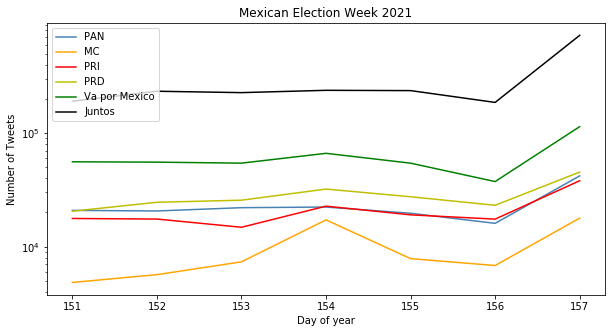

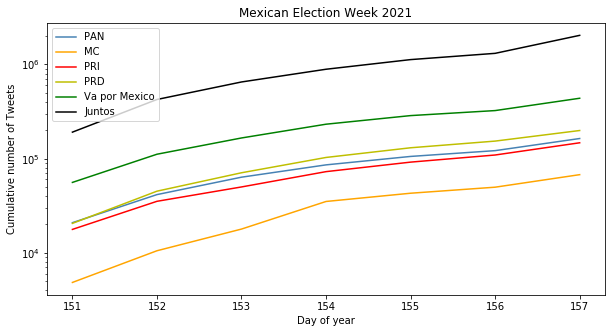

In [126]:
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# xBins = np.linspace(1,12,12)
# n, bins, patches = plt.hist(monthTest,xBins)
# plt.xticks(rotation=90)

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# xBins = np.linspace(1,53,53)
# n, bins, patches = plt.hist(weekTest,xBins)
# plt.xticks(rotation=90)

alphaNum = 0.3
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
xBins = np.unique(dayOfYearTest)
plt.plot(bins_PAN[1:],n_PAN, color='steelblue')
plt.plot(bins_MC[1:],n_MC,color='orange')
plt.plot(bins_PRI[1:],n_PRI,color='red')
plt.plot(bins_PRD[1:],n_PRD,color='y')
plt.plot(bins_vpM[1:],n_vpM,color='g')
plt.plot(bins_Juntos[1:],n_Juntos,color='k')

ax.set_yscale('log')
plt.title("Mexican Election Week 2021")
plt.xlabel("Day of year")
plt.ylabel("Number of Tweets")
plt.legend(['PAN','MC','PRI','PRD','Va por Mexico','Juntos'],loc='upper left')
plt.savefig("mexican_election_week.png", dpi=150)
# plt.xticks(rotation=90)

daysCDF_MC = np.cumsum(n_MC)
daysCDF_PAN = np.cumsum(n_PAN)
daysCDF_PRI = np.cumsum(n_PRI)
daysCDF_PRD = np.cumsum(n_PRD)
daysCDF_vpM = np.cumsum(n_vpM)
daysCDF_Juntos = np.cumsum(n_Juntos)

fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)
plt.plot(bins_PAN[1:],daysCDF_PAN, color='steelblue')
plt.plot(bins_MC[1:],daysCDF_MC,color='orange')
plt.plot(bins_PRI[1:],daysCDF_PRI,color='red')
plt.plot(bins_PRD[1:],daysCDF_PRD,color='y')
plt.plot(bins_vpM[1:],daysCDF_vpM,color='g')
plt.plot(bins_Juntos[1:],daysCDF_Juntos,color='k')

ax2.set_yscale('log')
plt.xlabel("Day of year")
plt.title("Mexican Election Week 2021")
plt.ylabel("Cumulative number of Tweets")
plt.legend(['PAN','MC','PRI','PRD','Va por Mexico','Juntos'],loc='upper left')
plt.savefig("mexican_election_week_cumulative.png", dpi=150)

In [ ]:
# set a date range of the data from Jan 1, 2019 to today
start_date = datetime(2019,1,1)
end_date   = datetime(2019,6,30)
days_diff = (end_date - start_date).days
NUM_POINTS = 30
random.seed(25)
# create a DataFrame of example data
data = pd.DataFrame()
for i in range(NUM_POINTS):
    this_date = start_date + \
        timedelta(days=random.randint(0,days_diff))    
    data = data.append({'date':this_date,'value': 'test'}, 
                       ignore_index=True)
# add columns for week and year of the date
data['date_week'] = data['date'].apply(lambda x: x.isocalendar()[1])
data['date_year'] = data['date'].apply(lambda x: x.isocalendar()[0])